# In this document, our aim is to use the Decision Tree model and to create 25 scenarios. We will pick the top 5 Universities based on instances and also the top 5 majors in each of the Universities. We will then run the Decision Tree model on them, on all 25 scenarios to understand the Accuracy, Precision and Recall. However, a higher goal is to create these 25 models to predict the results for students if they were in any of these 25 scenarios.
# We will store these models in a Dictionary so that given the inputs, we can use 1 of these models to help predict a student's outcome.
# We'll use an example here to illustrate.

In [1]:
# Loading the dataset
import pandas as pd
data_path = '/Users/nathanyap/Desktop/DataMining_Project/project/Nathan Findings/TOEFL_IELTS_Combined.csv'
df_admitsFYI = pd.read_csv(data_path)

## Start with Ranking the top 5 instances

In [2]:
university_counts = df_admitsFYI['University'].value_counts()
university_counts

University of Maryland, College Park           2944
Clemson University                             2350
Carnegie Mellon University                     2120
Georgia Institute of Technology                1878
State University of New York, Buffalo          1736
                                               ... 
South Dakota School of Mines and Technology       4
Jacobs University Bremen                          4
Johnson and Wales University, Providence          2
Hult International Business School, Boston        1
Lewis University                                  1
Name: University, Length: 75, dtype: int64

### Okay we can see here that the top 5 are 
### 1) University of Maryland, College Park 
### 2) Clemson University 
### 3) Carnegie Mellon University
### 4) Georgia Tech
### 5) State Uni of NY

In [4]:
# We'll take these 5 universities
top_universities = university_counts.head(5).index.tolist()
filtered_data = df_admitsFYI[df_admitsFYI['University'].isin(top_universities)]

# This data is filtered already
filtered_data

,University,Status,Target Major,GRE Verbal,GRE Quantitative,GRE Writing,GRE Total,UG College,UG Major,GPA,Papers,Work Exp,Season,Year,TOEFL/IELTS
781,Carnegie Mellon University,0,Aerospace Engineering,162.0,152.0,3.5,314.0,Amrita Coimbatore,Mechanical Engineering,3.2000,0.0,0,Fall,2013,8.2
782,Carnegie Mellon University,1,Architecture,160.0,150.0,3.0,310.0,NIT Bhopal,Architecture,3.3200,0.0,0,Fall,2020,8.3
783,Carnegie Mellon University,1,Architecture,154.0,166.0,5.0,320.0,NIT Trichy,Architecture,3.0400,0.0,0,Fall,2019,9.2
784,Carnegie Mellon University,1,Architecture,163.0,153.0,3.0,316.0,JADAVPUR UNIVERSITY,Architecture,3.5440,0.0,30,Fall,2020,8.9
785,Carnegie Mellon University,1,Architecture,156.0,149.0,3.5,305.0,Gujarat Technological University,Architecture,3.7040,0.0,6,Fall,2020,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32689,Georgia Institute of Technology,1,Telecommunication Engineering,164.0,161.0,4.0,325.0,K. J. Somaiya College of Engineering,Electronics and Telecommunication,2.6192,0.0,0,Fall,2014,9.7
32690,Georgia Institute of Technology,1,Telecommunication Engineering,161.0,157.0,4.0,318.0,University of Mumbai,Electronics and Telecommunication,3.0400,0.0,0,Fall,2013,9.2
32691,Georgia Institute of Technology,0,Telecommunication Engineering,164.0,154.0,3.5,318.0,University of Mumbai,Electronics and Telecommunication,3.0136,0.0,0,Fall,2012,8.2
32692,Georgia Institute of Technology,0,Telecommunication Engineering,166.0,156.0,3.0,322.0,UNIVERSITY OF MUMBAI,Electronics and Telecommunication,2.6800,0.0,0,Fall,2012,8.9


In [5]:
# This is just to make sure that there are only 5 unique university values in the list now
filtered_data.shape, filtered_data['University'].unique()

((11028, 15),
 array(['Carnegie Mellon University',
        'University of Maryland, College Park', 'Clemson University',
        'State University of New York, Buffalo',
        'Georgia Institute of Technology'], dtype=object))

## For the purposes of exploration, let's look into the Accuracy, Precision and Recall for all 5 universities

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# store everyhting in the dictionary
results = {}

# features and target
features = ['GPA', 'GRE Total', 'TOEFL/IELTS', 'Work Exp', 'Papers']
target = 'Status'

# we want to loop each of the 5 universities
for university in top_universities:
    # filter the dataset for the current university
    uni_data = filtered_data[filtered_data['University'] == university]
    
    # splitting to know our features and what our target is
    X = uni_data[features]
    y = uni_data[target]
    
    # training the sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    
    # predictions
    y_pred = dt_model.predict(X_test)
    
    # evaluations
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    
    # storing
    results[university] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }


# formatted_results = ""

for university, metrics in results.items():
    print(university)
    for metric, value in metrics.items():
        print(f"{metric} is {round(value * 100, 2)}%")
    print()

# results

University of Maryland, College Park
Accuracy is 95.81%
Precision is 97.19%
Recall is 96.71%

Clemson University
Accuracy is 98.58%
Precision is 98.47%
Recall is 98.97%

Carnegie Mellon University
Accuracy is 86.95%
Precision is 92.26%
Recall is 82.04%

Georgia Institute of Technology
Accuracy is 87.23%
Precision is 79.41%
Recall is 78.49%

State University of New York, Buffalo
Accuracy is 91.75%
Precision is 93.67%
Recall is 95.77%



## From the findings above, we just found that we're getting much better results when we actually filter them through scenarios specific to individual universities only

## Let's now move on to understanding what the Accuracy, Precision and Recall is like for each major. We'll first begin with getting the majors and then ranking the instances.

In [15]:
# store everything again in a dictionary
top_majors_per_university = {}

for university in top_universities:
    # get the current university
    uni_data = filtered_data[filtered_data['University'] == university]
    # count the instances
    major_counts = uni_data['Target Major'].value_counts().head(5)
    # store results
    top_majors_per_university[university] = major_counts

# this is to print them out 
for university, majors in top_majors_per_university.items():
    print(f"{university}:")
    for major, count in majors.items():
        print(f"- {major}: {count} instances")
    print() 

# top_majors_per_university

University of Maryland, College Park:
- Telecommunications Engineering: 300 instances
- Mechanical Engineering: 300 instances
- MIS: 292 instances
- Robotics: 280 instances
- Software Engineering: 260 instances

Clemson University:
- Civil Engineering: 312 instances
- Computer Science: 304 instances
- Mechanical Engineering: 296 instances
- Industrial Engineering: 296 instances
- Electrical Engineering: 292 instances

Carnegie Mellon University:
- Chemical Engineering: 156 instances
- Data Science: 154 instances
- Cyber Security: 148 instances
- Mechanical Engineering: 146 instances
- Robotics: 146 instances

Georgia Institute of Technology:
- Cyber Security: 166 instances
- Aerospace Engineering: 152 instances
- Industrial Engineering: 152 instances
- EECS: 150 instances
- Civil Engineering: 150 instances

State University of New York, Buffalo:
- Robotics: 170 instances
- Civil Engineering: 152 instances
- Data Science: 150 instances
- Computer Science: 148 instances
- MIS: 146 instan

In [8]:
# dictionary to hold the results for each scenario
scenario_results = {}

# process each university and its top 5 majors
for university in top_majors_per_university:
    for major, _ in top_majors_per_university[university].items():
        # filtering the dataset for the current university and major and we are zooming into
        scenario_data = filtered_data[(filtered_data['University'] == university) & (filtered_data['Target Major'] == major)]
        
        # testing
        X = scenario_data[features]
        y = scenario_data[target]
        
        # running the training
        if len(scenario_data) >= 10:  # this is just to make sure that there is enough data to split, although not very needed since we know there will be at least 10 instances
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
            
            dt_model = DecisionTreeClassifier(random_state=42)
            dt_model.fit(X_train, y_train)
            
            y_pred = dt_model.predict(X_test)
            
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='binary')
            recall = recall_score(y_test, y_pred, average='binary')
        else:
            accuracy, precision, recall = None, None, None  # indicating insufficient data for a split
        
        # keeping the results
        scenario_key = f"{university} - {major}"
        scenario_results[scenario_key] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall
        }

# now we want to find a way to print all the results
for scenario, metrics in scenario_results.items():
    # we want to 2dp
    accuracy = f"{metrics['Accuracy'] * 100:.2f}%" if metrics['Accuracy'] is not None else "N/A"
    precision = f"{metrics['Precision'] * 100:.2f}%" if metrics['Precision'] is not None else "N/A"
    recall = f"{metrics['Recall'] * 100:.2f}%" if metrics['Recall'] is not None else "N/A"
    
    # printing everything ou
    print(f"{scenario}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print()
    
    
# scenario_results

University of Maryland, College Park - Telecommunications Engineering:
  Accuracy: 100.00%
  Precision: 100.00%
  Recall: 100.00%

University of Maryland, College Park - Mechanical Engineering:
  Accuracy: 100.00%
  Precision: 100.00%
  Recall: 100.00%

University of Maryland, College Park - MIS:
  Accuracy: 100.00%
  Precision: 100.00%
  Recall: 100.00%

University of Maryland, College Park - Robotics:
  Accuracy: 100.00%
  Precision: 100.00%
  Recall: 100.00%

University of Maryland, College Park - Software Engineering:
  Accuracy: 94.87%
  Precision: 84.62%
  Recall: 100.00%

Clemson University - Civil Engineering:
  Accuracy: 100.00%
  Precision: 100.00%
  Recall: 100.00%

Clemson University - Computer Science:
  Accuracy: 95.65%
  Precision: 100.00%
  Recall: 93.55%

Clemson University - Mechanical Engineering:
  Accuracy: 100.00%
  Precision: 100.00%
  Recall: 100.00%

Clemson University - Industrial Engineering:
  Accuracy: 100.00%
  Precision: 100.00%
  Recall: 100.00%

Clemson

In [9]:
# we are running this other way because we forgot to store all the models we created into something
# we want to store it in a dictionary
models_dict = {}

# same processing technique
for university in top_majors_per_university:
    for major, _ in top_majors_per_university[university].items():
        # filtering based on that school and that specific major
        scenario_data = filtered_data[(filtered_data['University'] == university) & (filtered_data['Target Major'] == major)]
        
        # splitting againt to know the target and features
        X = scenario_data[features]
        y = scenario_data[target]
        
        # doing the exact same thing as above
        if len(scenario_data) >= 10:  # not really necessary
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
            
            dt_model = DecisionTreeClassifier(random_state=42)
            dt_model.fit(X_train, y_train)
            
            # this is the impt part, we are actually trying to store the model
            # storing the trained model in the dictionary with a unique key
            scenario_key = f"{university} - {major}"
            models_dict[scenario_key] = dt_model
        else:
            # just a catch scenario if it fails
            scenario_key = f"{university} - {major}"
            models_dict[scenario_key] = None

# models are now stored in the dictionary
# this is to test what prints out the top 5
list(models_dict.keys())[:5]


['University of Maryland, College Park - Telecommunications Engineering',
 'University of Maryland, College Park - Mechanical Engineering',
 'University of Maryland, College Park - MIS',
 'University of Maryland, College Park - Robotics',
 'University of Maryland, College Park - Software Engineering']

In [11]:
# student's data prepared for prediction
# Let's now test a certain scenario for a student who wants to get into CMU as a Mech E major
student_data = {
    'GPA': [3.5],
    'GRE Total': [320],
    'TOEFL/IELTS': [7.8],
    'Work Exp': [10],
    'Papers': [1]
}
student_df = pd.DataFrame.from_dict(student_data)

# This is the key we need
model_key = "Carnegie Mellon University - Mechanical Engineering"

# extracting the appropriate model from the dictionary
if model_key in models_dict:
    model = models_dict[model_key]
    if model is not None:
        # if we have the model
        prediction = model.predict(student_df)
    else:
        prediction = "Insufficient data for a reliable model."
else:
    prediction = "Model not found for the specified university and major."

    
# if the prediction is 1, means the student got in, if not is 0 and the student did not get in
prediction

array([1])

## Great, given the above, it seems like the model works. But given our analysis so far, we have not actually checked whether or not these models are even useful. So let's just do a sanity check and see if the ROC curve says it is a good curve.
## let's run to see the ROC for CMU

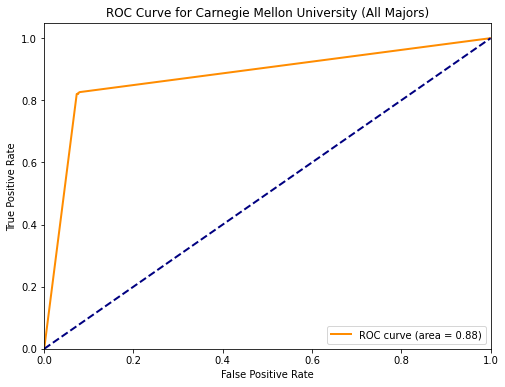

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# we want CMU
cmu_data = filtered_data[filtered_data['University'] == "Carnegie Mellon University"]
X_cmu = cmu_data[features]
y_cmu = cmu_data[target]

# we are training for CMU in general
X_train_cmu, X_test_cmu, y_train_cmu, y_test_cmu = train_test_split(X_cmu, y_cmu, test_size=0.3, random_state=42)

dt_model_cmu = DecisionTreeClassifier(random_state=42)
dt_model_cmu.fit(X_train_cmu, y_train_cmu)

y_scores_cmu = dt_model_cmu.predict_proba(X_test_cmu)[:, 1]

# Compute ROC curve and ROC area
fpr_cmu, tpr_cmu, _ = roc_curve(y_test_cmu, y_scores_cmu)
roc_auc_cmu = auc(fpr_cmu, tpr_cmu)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_cmu, tpr_cmu, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_cmu:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Carnegie Mellon University (All Majors)')
plt.legend(loc="lower right")
plt.show()
